# HotplateControl
This Jupyter notebook can be used to control the temperature and stirring speed of a DragonLab hotplate stirrer. Two types of commands are supported: 
* a simple set command, which sets the temperature or stirring speed at a fixed value, and 
* a ramp command, which semi-continuously raises the temperature or stirring speed to a value in a predefined timespan. 

The commands are supplied in the form of a file, in which a new command in entered on each line. The commands file has the following structure:

    <length of command in s> <ramp/set> <s/t> <final temperature in 0.1 degree/stirring speed in rpm>
For example,

    300 set t 3000
sets the temperature to 300 degrees celcius for 300 seconds and

    500 ramp s 250
ramps the stirring speed to 250 rpm in 500 seconds.

In [1]:
from HotplateControl import *

## File administration
List the available command files, make a new command file or delete a command file.

### *List commands files*

In [2]:
for item in list_cmd_files():
    print(item)

test.txt
testfile.txt


### *Make a commands file*

In [3]:
make_cmd_file(cmds=
'''
1 set s 0
30 set t 5000
30 set t 0
30 set t 500
30 set t 1000
30 set t 2000
60 ramp t 3000
30 set s 1500
30 set s 0
30 set s 300
30 set s 600
30 set s 1000
60 ramp s 0
''',
filename='testfile.txt')

### *Delete a commands file*


In [4]:
delete_cmd_file(filename='somefile.txt')

## Connect and run file
Connect to the hotplate, initialize and run the commands in a specified commands file. The correct COM-port can be found in Windows device manager, or equivalent. The exec_cmd_file() method takes a single parameter, which contains the name of the commands file. 

In [3]:
cmd_file = 'testfile.txt'
with Hotplate(port_name='COM8', step_size=10,
                  plotfile='plotfile.csv', logfile='hotplate.log') as hp:
    hp.exec_cmd_file(cmd_file)

Connecting.................Connected
Time: 427.15; Set temp: .0; Act temp: 227.0; Set speed: 1000; Act speed: 998983
Procedure finished

Connection closed


## Connect and monitor
Connect to the hotplate, initialize and monitor the temperature and stirring speed. The correct COM-port can be found in Windows device manager, or equivalent. The monitor() method can be called with a max_time parameter which determines how long the function runs. Without that parameter, the function will run indefinitely, or until it is interrupted by pressing i twice. 

In [2]:
cmd_file = 'test.txt'
with Hotplate(port_name='COM8', step_size=10,
                  plotfile='monitorfile.csv', logfile='hotplate.log') as hp:
    hp.monitor()

Connecting.................Connected
Time: 2.6769; Set temp: 50.0; Act temp: 50.0; Set speed: 300; Act speed: 0
Connection closed


## Plot the data
Plot the temperature and stirring speed measured by the hotplate. The plot_hp_file() method takes as parameters four (optional) Boolean values, which determine whether the temperature and stirring speed are plotted, and a string containing the filename. By default, all data is plotted.

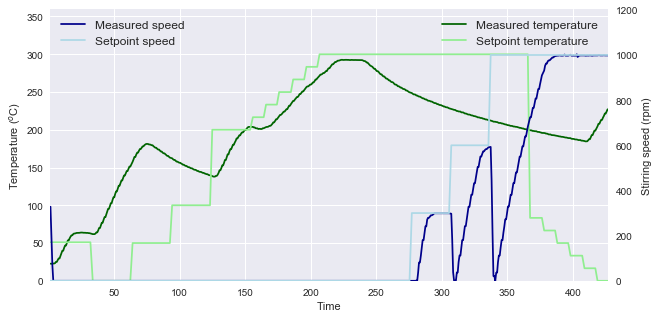

In [5]:
%matplotlib inline
plot_hp_file(filename='plotfile.csv', set_temp=True, actual_temp=True, set_speed=True, actual_speed=True)